In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import common

# 花ブロックの計算方法（解析法、メッシュ法）の比較

## 作図用の関数を定義

In [2]:
def setPltScatter(case_name:str, direction:str, calc_mode_x:str, calc_mode_y:str, fig_title:str, x_label:str, y_label:str, x_data_name:str, y_data_name:str,
                 xlim_min:float, xlim_max:float, ylim_min:float, ylim_max:float, file_name:str):
# def setPltScatter(df_x:pd.DataFrame, df_y:pd.DataFrame, fig_title:str, x_label:str, y_label:str, x_data_name:str, y_data_name:str,
#                  xlim_min:float, xlim_max:float, ylim_min:float, ylim_max:float, file_name:str):
    
    """
    グラフを描画する
    
    :param df_x: CSVファイルの全データ（真値）
    :param df_y: CSVファイルの全データ（比較値）
    :param fig_title: グラフタイトル
    :param x_label: X軸のラベル
    :param y_label: Y軸のラベル
    :param x_data_name: X軸に設定するデータの名称
    :param y_data_name: Y軸に設定するデータの名称
    :param xlim_min: X軸の下限
    :param xlim_max: X軸の上限
    :param ylim_min: y軸の下限
    :param ylim_max: y軸の上限
    :param file_name: 画像データのファイル名
    :return: なし
    """
        
    # グラフを表示する領域（figureオブジェクト）、グラフを描画する領域（Axesオブジェクト）を作成
    # グラフサイズを指定する　デフォルト：figsize=(6.4, 4.8)、小サイズ：figsize=(3.7, 3.5)
    fig, ax = plt.subplots(figsize=(3.7, 3.5))
    
    # サブプロットの位置調整
    fig.subplots_adjust(left=0.2, bottom=0.2)
    
    # フォントサイズを設定
    plt.rcParams["font.size"] = 12

    # グラフタイトルを設定
    fig.suptitle(fig_title)

    # 補助軸の設定
    ax.grid(which='major', color='gray', linestyle='-')
    ax.grid(which='minor', color='gray', linestyle='-')
    
    # 軸ラベルの設定
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    # データ抽出日の設定
    targets = {
        'region1': {'region': 1, 'color': 'g'},
        'region6': {'region': 6, 'color': 'r'},
        'region8': {'region': 8, 'color': 'y'}
    }
    
    # 線形グラフの描画設定    
    ax.plot([xlim_min, xlim_max], [ylim_min, ylim_max], linewidth=1, color="black")
    
    # 散布図の描画設定
    for key, value in targets.items():
        
        # CSVファイルを読み込む（真値）
        file_name = 'result' + '/' + calc_mode_x + '_case' + case_name + '_' + 'region' + str(value['region']) + '_' + direction
        df_x = pd.read_csv(file_name + '.csv', index_col=0, encoding="shift-jis")
        
        # CSVファイルを読み込む（比較値）
        file_name = 'result' + '/' + calc_mode_y + '_case' + case_name + '_' + 'region' + str(value['region']) + '_' + direction
        df_y = pd.read_csv(file_name + '.csv', index_col=0, encoding="shift-jis")
        
        # データ抽出日の設定
        target_dates = {
            'spring': {'月': 3, '日': 23},
            'summer': {'月': 6, '日': 22},
            'autumn': {'月': 9, '日': 21},
            'winter': {'月': 12, '日': 22}
        }
        
        # 結果格納用のDataFrameを用意
        df_x_all = pd.DataFrame()
        df_y_all = pd.DataFrame()

        # 散布図の描画設定
        for season, date in target_dates.items():
            df_x_all = pd.concat([df_x_all, df_x.query('月 == ' + str(date['月']) + ' & 日 == ' + str(date['日']))])
            df_y_all = pd.concat([df_y_all, df_y.query('月 == ' + str(date['月']) + ' & 日 == ' + str(date['日']))])

        x = df_x_all[y_data_name]
        y = df_y_all[y_data_name]
        label = key
        ax.scatter(x, y, color=value['color'], label= label, marker=".")
            
    # 軸の描画範囲設定
    ax.set_xlim(xlim_min, xlim_max)
    ax.set_ylim(ylim_min, ylim_max)
    
    # TODO: 横軸の間隔を設定する
    #plt.xticks(np.arange(0, 25, step=4))
    
    # グラフ描画&画像データの保存
    plt.legend()
    plt.savefig(file_name, format="png", dpi=72)
    plt.show()

## 地域、方位、計算モードの設定

In [3]:
directions = {'N': 180.0, 'E': -90.0, 'S': 0.0, 'W': 90.0}
calc_mode_x = 'analysis'
calc_mode_y = 'mesh'

## 試算結果
### 四角形の場合

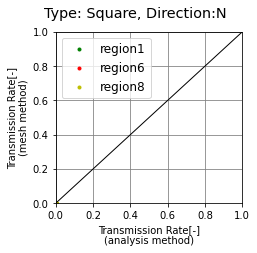

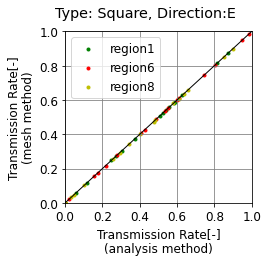

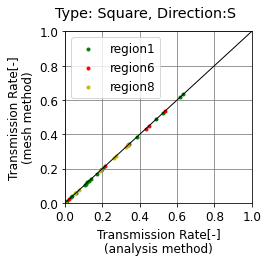

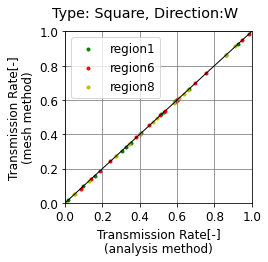

In [4]:
case_name = '01'

# 方位ループ
for direction in directions.keys():
        
    # グラフ描画
    setPltScatter(case_name=case_name,
                  direction=direction,
                  calc_mode_x=calc_mode_x,
                  calc_mode_y=calc_mode_y,
                  fig_title = 'Type: Square, Direction:' + direction,
                  x_label = 'Transmission Rate[-]\n(' + calc_mode_x + " method)",
                  y_label = 'Transmission Rate[-]\n(' + calc_mode_y + " method)", 
                  x_data_name = "時",
                  y_data_name = "direct_transmission_rate",
                  xlim_min = 0.0,
                  xlim_max = 1.0,
                  ylim_min = 0.0,
                  ylim_max = 1.0,
                  file_name = 'compare_result_case' + case_name + '_' + direction + '.png'
                 )
    

### 円形の場合

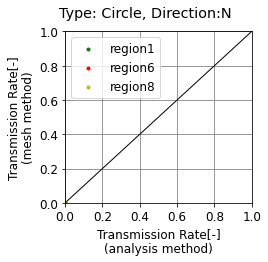

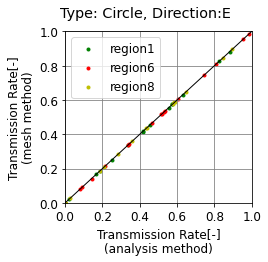

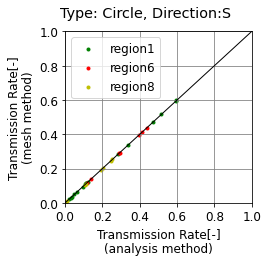

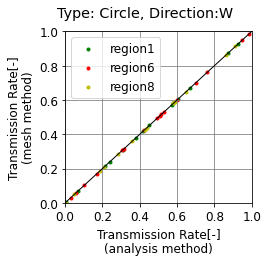

In [5]:
case_name = '02'

# 方位ループ
for direction in directions.keys():
    
    # グラフ描画
    setPltScatter(case_name=case_name,
                  direction=direction,
                  calc_mode_x=calc_mode_x,
                  calc_mode_y=calc_mode_y,
                  fig_title = 'Type: Circle, Direction:' + direction,
                  x_label = 'Transmission Rate[-]\n(' + calc_mode_x + " method)",
                  y_label = 'Transmission Rate[-]\n(' + calc_mode_y + " method)", 
                  x_data_name = "時",
                  y_data_name = "direct_transmission_rate",
                  xlim_min = 0.0,
                  xlim_max = 1.0,
                  ylim_min = 0.0,
                  ylim_max = 1.0,
                  file_name = 'compare_result_case' + case_name + '_' + direction + '.png'
                 )
    

### 三角形の場合（その1）

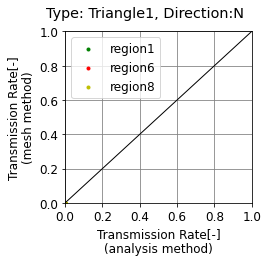

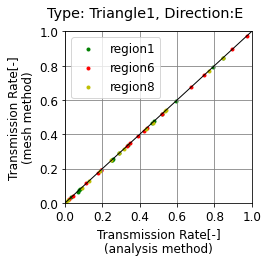

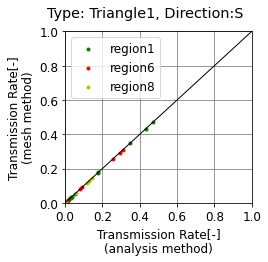

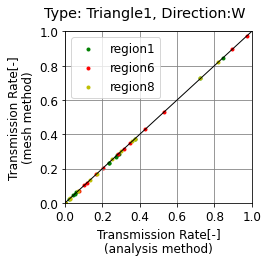

In [6]:
case_name = '03'

# 方位ループ
for direction in directions.keys():
    
    # グラフ描画
    setPltScatter(case_name=case_name,
                  direction=direction,
                  calc_mode_x=calc_mode_x,
                  calc_mode_y=calc_mode_y,
                  fig_title = 'Type: Triangle1, Direction:' + direction,
                  x_label = 'Transmission Rate[-]\n(' + calc_mode_x + " method)",
                  y_label = 'Transmission Rate[-]\n(' + calc_mode_y + " method)", 
                  x_data_name = "時",
                  y_data_name = "direct_transmission_rate",
                  xlim_min = 0.0,
                  xlim_max = 1.0,
                  ylim_min = 0.0,
                  ylim_max = 1.0,
                  file_name = 'compare_result_case' + case_name + '_' + direction + '.png'
                 )
    

### 三角形の場合（その2）

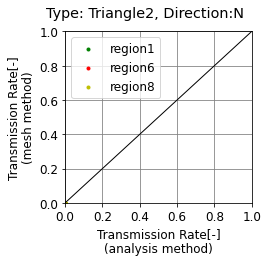

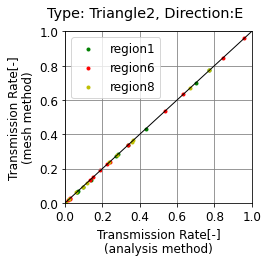

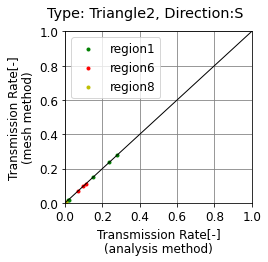

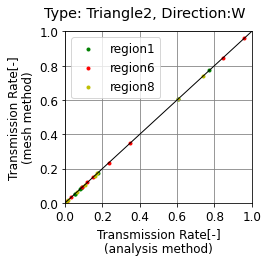

In [7]:
case_name = '04'

# 方位ループ
for direction in directions.keys():
    
    # グラフ描画
    setPltScatter(case_name=case_name,
                  direction=direction,
                  calc_mode_x=calc_mode_x,
                  calc_mode_y=calc_mode_y,
                  fig_title = 'Type: Triangle2, Direction:' + direction,
                  x_label = 'Transmission Rate[-]\n(' + calc_mode_x + " method)",
                  y_label = 'Transmission Rate[-]\n(' + calc_mode_y + " method)", 
                  x_data_name = "時",
                  y_data_name = "direct_transmission_rate",
                  xlim_min = 0.0,
                  xlim_max = 1.0,
                  ylim_min = 0.0,
                  ylim_max = 1.0,
                  file_name = 'compare_result_case' + case_name + '_' + direction + '.png'
                 )
    